# <center>第十章 多元分析</center>
## <center>第一节 聚类分析</center>

**介绍**  
这里是司守奎教授的《数学建模算法与应用》全书案例代码python实现，欢迎加入此项目将其案例代码用python实现  
GitHub项目地址：[Mathematical-modeling-algorithm-and-Application](https://github.com/STL-CC/Mathematical-modeling-algorithm-and-Application)  
CSDN专栏：[数学建模](https://blog.csdn.net/stl_cc/category_10228778.html)  
知乎专栏：[数学建模算法与应用](https://zhuanlan.zhihu.com/c_1271013077337964544)  
**联系作者**  
作者：STL_CC  
邮箱：<1459078309@qq.com>  

由于作者还是大一学生，才疏学浅，难免会有错误，欢迎指正  
同时作者精力有限，希望更多大佬加入此项目，一来可以提高建模水平，二来可以分享建模经验

### **系统聚类法**  
**例10.1**  
设有5个销售员$w_1$,$w_2$,$w_3$,$w_4$,$w_5$,他们的销售业绩由二维变量($v_1$,$v_2$)描述,见表1 销售员业绩表 

|  销售员   | $v_1$(销售量)百件  |$v_2$(回收款项)万元|
|  :----:  | :----:  |:----:|
|  $w_1$ | 1 |0|
| $w_2$  | 1 |1|
| $w_3$  | 3 |2|
| $w_4$  | 4 |3|
| $w_5$  |2 |5|

**方法一**  系统聚类法中的最长距离法

In [1]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [2]:
a = np.array([[1,0],[1,1],[3,2],[4,3],[2,5]])
(m,n)=a.shape
d = np.zeros((m,m))

In [3]:
for i in range(m):
    for j in range(i+1,m):
        d[i,j]=sum(map(abs,(a[i,:]-a[j,:])))

In [4]:
nd=d.ravel()[np.flatnonzero(d)]
nd=np.unique(nd)

In [5]:
l=len(nd)
for i in range(0,l):
    nd_min=min(nd)
    (row,col)=np.where(d==nd_min)
    tm=np.union1d(row,col)
    print('第{:d}次合成,平台高度为{}时的分类结果为:{}'.format(i+1,nd_min,tm))
    nd=np.delete(nd,np.where(nd==min(nd)))
    if(not len(nd)):
        break

第1次合成,平台高度为1.0时的分类结果为:[0 1]
第2次合成,平台高度为2.0时的分类结果为:[2 3]
第3次合成,平台高度为3.0时的分类结果为:[1 2]
第4次合成,平台高度为4.0时的分类结果为:[0 2 3 4]
第5次合成,平台高度为5.0时的分类结果为:[1 3 4]
第6次合成,平台高度为6.0时的分类结果为:[0 3 4]


**方法二** 使用python的scipy库

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [7]:
a = np.array([[1,0],[1,1],[3,2],[4,3],[2,5]])
y=pdist(a,'cityblock')
yc=squareform(y)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [5.0, 5.0, 30.0, 30.0]],
 'dcoord': [[0.0, 1.0, 1.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [1.0, 3.0, 3.0, 2.0],
  [0.0, 4.0, 4.0, 3.0]],
 'ivl': ['4', '0', '1', '2', '3'],
 'leaves': [4, 0, 1, 2, 3],
 'color_list': ['g', 'r', 'b', 'b']}

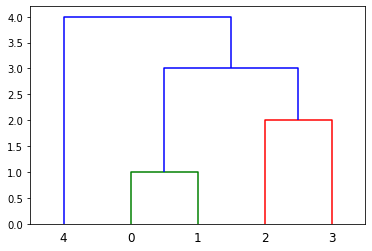

In [8]:
z=linkage(y)
dendrogram(z)

In [9]:
T = fcluster(z,3,'maxclust')

In [10]:
for i in range(1,3+1):
    tm=np.where(T==i)
    print('第{}类的有'.format(i),tm)

第1类的有 (array([0, 1], dtype=int64),)
第2类的有 (array([2, 3], dtype=int64),)
第3类的有 (array([4], dtype=int64),)


### **变量聚类法**  
**例10.2**  服装标准制定中的变量聚类法。  
在服装标准制定中，对某地成年女子的各部位尺寸进行了统计，通过14个部位的测量资料，获得各因素之间的相关系数表（见表5）。  
注：具体资料见教材，部分数据将在程序中给出

In [11]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [12]:
a=pd.read_csv('ch.txt',header=None,sep='	')

In [13]:
a

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.366,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.242,0.233,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.280,0.194,0.590,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.360,0.324,0.476,0.435,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.282,0.262,0.483,0.470,0.452,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.245,0.265,0.540,0.478,0.535,0.663,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.448,0.345,0.452,0.404,0.431,0.322,0.266,1.000,NaN,NaN,NaN,NaN,NaN,NaN
8,0.486,0.367,0.365,0.357,0.429,0.283,0.287,0.820,1.000,NaN,NaN,NaN,NaN,NaN
9,0.648,0.662,0.216,0.032,0.429,0.283,0.263,0.527,0.547,1.000,NaN,NaN,NaN,NaN


In [14]:
d=1-abs(a)

In [15]:
for i in range(len(d)):
    for j in range(i+1,len(d)):
        d.iloc[i,j]=d.iloc[j,i]

In [16]:
z=linkage(d,'complete')
y=fcluster(z,2,'maxclust')

D:\Program Files\anaconda\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [13.75, 13.75, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [105.0, 105.0, 122.5, 122.5],
  [82.5, 82.5, 113.75, 113.75],
  [33.125, 33.125, 98.125, 98.125]],
 'dcoord': [[0.0, 0.29809729955167313, 0.29809729955167313, 0.0],
  [0.0, 0.4028870809544531, 0.4028870809544531, 0.29809729955167313],
  [0.0, 0.7535436284648688, 0.7535436284648688, 0.4028870809544531],
  [0.0, 0.28955310393777517, 0.28955310393777517, 0.0],
  [0.0, 0.9263082640244553, 0.9263082640244553, 0.28955310393777517],
  [0.7535436284648688,
   1.158768311613672,
   1.158768311613672,
   0.9263082640244553],
  [0.0, 0.49697082409332655, 0.49697082409332655, 0.0],
  [0.0, 0.8415325305655154, 0.8415325305655154, 0.49697082409332655],
  [0.0, 0.5600321419347287, 0.5600321419347287, 0.0],

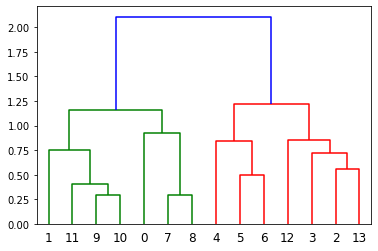

In [17]:
dendrogram(z)

**说明**  
1.在教材原来的matlab程序的数据预处理中，原始数据被去掉了0，向量长度不一。然而这样长度不一的向量是不能在python中被处理的。笔者将其转换为了一个对称矩阵再行操作，更能适应python操作。  
2.在matlab中，相关系数矩阵计算使用的corrcoef列指标是变量，然而np.corrcoef行指标是向量，所以要先转置  
**参考文献**  
1.[python中scipy库实现计算各种距离](https://blog.csdn.net/Jiajikang_jjk/article/details/83474446)   
2.[Python之向量（Vector）距离矩阵计算](https://zhuanlan.zhihu.com/p/77034615)  
3.[scipy.spatial.distance.pdist官方文档](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)  
4.[使用Python进行层次聚类（一）——基本使用+主成分分析绘图观察结果+绘制热图](https://blog.csdn.net/qq_19528953/article/details/79133889)  
5.[python的scipy层次聚类参数详解](https://blog.csdn.net/enigma_tong/article/details/79081449)  
6.[皮尔逊积矩相关系数--NumPy--corrcoef()](https://blog.csdn.net/weixin_38287297/article/details/81501529)

### **案例研究**  
**聚类分析案例—我国各地区普通高等教育发展状况分析**  
具体资料见教材，部分数据将在程序中给出

**R型聚类分析**

In [18]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster

In [19]:
gj=pd.read_csv('gj.txt',header=None,sep='	').T

D:\Program Files\anaconda\lib\site-packages\ipykernel_launcher.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  after removing the cwd from sys.path.


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [45.0, 45.0, 71.25, 71.25],
  [35.0, 35.0, 58.125, 58.125],
  [25.0, 25.0, 46.5625, 46.5625],
  [10.0, 10.0, 35.78125, 35.78125]],
 'dcoord': [[0.0, 0.8525484864006131, 0.8525484864006131, 0.0],
  [0.0, 0.024863305626884467, 0.024863305626884467, 0.0],
  [0.0, 0.02757546216575882, 0.02757546216575882, 0.0],
  [0.0, 0.04009972160627508, 0.04009972160627508, 0.02757546216575882],
  [0.024863305626884467,
   0.14222971620143948,
   0.14222971620143948,
   0.04009972160627508],
  [0.0, 0.3129510501346711, 0.3129510501346711, 0.14222971620143948],
  [0.0, 0.4732207840475411, 0.4732207840475411, 0.3129510501346711],
  [0.0, 1.0379457746449512, 1.0379457746449512, 0.4732207840475411],
  [0.8525484864006131,
   1.7688040008982475,
   1.7688040008982475,
   1.0379457746449512]],
 'ivl': ['6', '7', '9', '8', '0', '4', '5', '1', '2', '3'],
 'leaves'

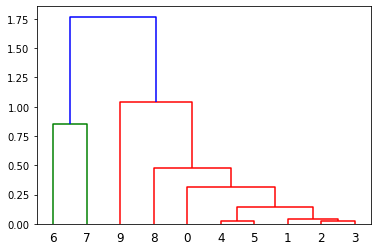

In [20]:
r=np.corrcoef(gj)
d=1-r
d=d.T
z=linkage(d,'average')
dendrogram(z)

In [21]:
T=fcluster(z,6,'maxclust')

In [22]:
for i in range(1,6+1):
    tm=np.where(T==i)
    print('第{}类的有'.format(i),tm)

第1类的有 (array([6], dtype=int64),)
第2类的有 (array([7], dtype=int64),)
第3类的有 (array([1, 2, 3, 4, 5], dtype=int64),)
第4类的有 (array([0], dtype=int64),)
第5类的有 (array([8], dtype=int64),)
第6类的有 (array([9], dtype=int64),)


**Q型聚类分析**

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from scipy.stats import zscore

In [24]:
gj=pd.read_csv('gj.txt',header=None,sep='	')
gj.drop([2,3,4,5],axis=1,inplace=True)
gj=zscore(gj)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [151.875, 151.875, 202.5, 202.5],
  [103.75, 103.75, 177.1875, 177.1875],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [285.0, 285.0, 295.0, 295.0],
  [275.0, 275.0, 290.0, 290.0],
  [265.0, 265.0, 282.5, 282.5],
  [233.75, 233.75, 273.75, 273.75],
  [140.46875, 140.46875, 253.75, 253.75],
  [85.0, 85.0, 197.109375, 197.109375],
  [75.0, 75.0, 141.0546875, 141.0546875],
  [52.5, 52.5, 108.02734375, 108.02734375],
  [30.0, 30.0, 80.263671875, 80.263671875],
  [15.0, 15.0, 55.1318359375, 55.1318359375],
  [5.0, 5.0, 35.06591796

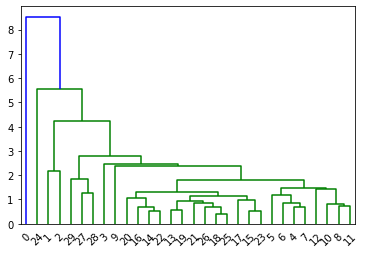

In [25]:
y=pdist(gj)
z=linkage(y,'average')
dendrogram(z)

In [26]:
for k in range(3,6):
    print('划分成{}类的结果如下'.format(k))
    T=fcluster(z,k,'maxclust')
    for i in range(1,k+1):
        tm=np.where(T==i)
        print('第{}类的有{}'.format(i,tm))

划分成3类的结果如下
第1类的有(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29], dtype=int64),)
第2类的有(array([24], dtype=int64),)
第3类的有(array([0], dtype=int64),)
划分成4类的结果如下
第1类的有(array([1, 2], dtype=int64),)
第2类的有(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 25, 26, 27, 28, 29], dtype=int64),)
第3类的有(array([24], dtype=int64),)
第4类的有(array([0], dtype=int64),)
划分成5类的结果如下
第1类的有(array([1, 2], dtype=int64),)
第2类的有(array([27, 28, 29], dtype=int64),)
第3类的有(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 25, 26], dtype=int64),)
第4类的有(array([24], dtype=int64),)
第5类的有(array([0], dtype=int64),)
